# Project 2
## Image Classification with CNN
-------------------------------
**Integrante 1**: Ángela Patricia Ordoñez Castro...............................................**Código**:201628709

**Integrante 2**: Ricardo Medina Aponte...........................................................  **Código**: 200520707

**Integrante 3**: Juan Sebastián Garcés Carranza.............................................**Código**: 201628949

**Integrante 4**: Andrea Carolina Parra López................................................... **Código**: 201727740

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to 4/AACnrWrTtHgfBxYq7fKb1o44-k29ag1qeUhS5iKnPwl4UK3hWYDD-8sbe done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
   * Use [Keras](https://keras.io/) and a CNN from Keras [Applications](https://keras.io/applications/) pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
   * Discuss the results.
   


**Solución:**



Mediante la librería Keras, usamos el modelo precargado VGG16, con el fin de pasar inicialmente las imagenes mediante este modelo:

In [2]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)


Using TensorFlow backend.


553467904/553467096 [==============================] - 18s 0us/step


Se descargan las imagenes para incluir al modelo, directamente de esta [página](http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip), mediante el siguiente código:

In [3]:
!wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip

--2018-07-16 02:39:24--  http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
Resolving www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)... 128.174.227.253
Connecting to www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)|128.174.227.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43988823 (42M) [application/zip]
Saving to: ‘birds.zip.3’

birds.zip.3         100%[===================>]  41.95M  21.9MB/s    in 1.9s    

2018-07-16 02:39:26 (21.9 MB/s) - ‘birds.zip.3’ saved [43988823/43988823]



Para revisar los elementos que se encuentran en la carpeta descargada y descomprimir la carpeta:

In [4]:
!ls

birds.zip    birds.zip.2  C:	   Test_X.npy
birds.zip.1  birds.zip.3  datalab  Train_X.npy


In [0]:
!unzip birds.zip > /dev/null

In [6]:
!ls birds -la

total 36
drwxr-xr-x 8 root root 4096 Mar  2  2005 .
drwxr-xr-x 1 root root 4096 Jul 16 02:39 ..
drwxr-xr-x 2 root root 4096 Mar  2  2005 egret
drwxr-xr-x 2 root root 4096 Mar  2  2005 mandarin
drwxr-xr-x 2 root root 4096 Mar  2  2005 owl
drwxr-xr-x 2 root root 4096 Mar  2  2005 puffin
drwxr-xr-x 2 root root 4096 Mar  2  2005 toucan
drwxr-xr-x 2 root root 4096 Mar  2  2005 wood_duck


Dentro de la carpeta descargada se encuentran las imagenes de las aves organizadas en carpetas por especies, como se puede ver a continuación:

In [7]:
import os 
fold_list = os.listdir('birds')
fold_list

['puffin', 'toucan', 'egret', 'wood_duck', 'owl', 'mandarin']

Con el siguiente código es posible cargar todas las imagenes de las aves independiente de la especie:

In [8]:
#CARGA DE IMAGENES DE PAJAROS
fold_list = os.listdir('birds')

imgs = []
all_imgs = []
for i in fold_list:
  image_folder = 'birds/' + i
  img_list = os.listdir(image_folder)
  all_img_feats = list()
  si = 0
  batch_size=1000
  for j in img_list:
    img_path = os.path.join(image_folder, j)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    imgs.append(x)
      
all_imgs = np.concatenate(imgs, axis=0) 

all_imgs.shape

(600, 224, 224, 3)

Una vez cargadas las imagenes y el modelo preentrenado, hacemos una primera predicción:

In [0]:
#PREDICCION CON VGG16 DE TODAS LAS IMAGENES (600)
features = model.predict(all_imgs)

In [10]:
features.shape

(600, 1000)

In [11]:
type(features)

numpy.ndarray

In [17]:
import itertools
y = list(itertools.chain.from_iterable(itertools.repeat(x, 100) for x in fold_list))
len(y)

600

In [0]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(features)

El modelo VGG16 contiene las categorías de las aves ya cargadas, por lo tanto al hacer la predicción se encontrarán tipos de ave que no se tienen en cuenta para estas imagenes, como se muestra a continuación:

In [0]:
y_pred = []
for i in label:
  y_pred.append(i[0][1])
  
pd.value_counts(y_pred)[0:10]

Con la predicción inicial calculamos la matriz de confusión de las categorías de aves de la base vs las categorías de aves más frecuentes del modelo preentrenado:

In [21]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y, y_pred, labels=fold_list)
conf

array([[ 0, 13,  0,  0,  0,  0],
       [ 0, 96,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0]])

In [0]:
#FUNCION PARA GRAFICAR CONFUSION MATRIX

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(conf, classes=fold_list,
#                      title='Confusion matrix, without normalization')


Dado que el modelo VGG16 tiene más de 6 categorías, tendremos en cuenta las 10 más frecuentes, que son las siguientes:

In [23]:
#LAS 10 PREDICCIONES MAS FRECUENTES
from collections import Counter
import pandas as pd
import io, os
frec_pred = Counter(y_pred)

top = pd.DataFrame(frec_pred.most_common(10))

top

,0,1
0,drake,183
1,toucan,114
2,American_egret,89
3,ptarmigan,41
4,oystercatcher,17
5,hen,14
6,kite,12
7,albatross,11
8,magpie,10
9,king_penguin,8


Se muestran las predicciones del modelo VGG16, vs los datos reales:

In [24]:
res = pd.DataFrame({'Real': y,'Predicción_VGG16': y_pred})

restop = res[res['Predicción_VGG16'].isin(list(top[0]))]
restop

,Predicción_VGG16,Real
0,king_penguin,puffin
1,drake,puffin
2,king_penguin,puffin
3,drake,puffin
5,toucan,puffin
6,drake,puffin
7,drake,puffin
8,drake,puffin
11,king_penguin,puffin
13,drake,puffin


El modelo asemeja la clase real mandarin con la clase drake, y algunos pájaros de la clase puffin como toucan.


La siguiente es la matriz de confunsión construida con las categorías reales de las aves y las 10 clases más frecuentes que se obtienen a partir de las predicciones del modelo:

In [0]:
import seaborn as sns
heat = pd.pivot_table(data = restop, values = 'Predicción_VGG16', index = 'Predicción_VGG16', columns = 'Real', aggfunc=lambda x: np.count_nonzero(x), fill_value=0)
#heat

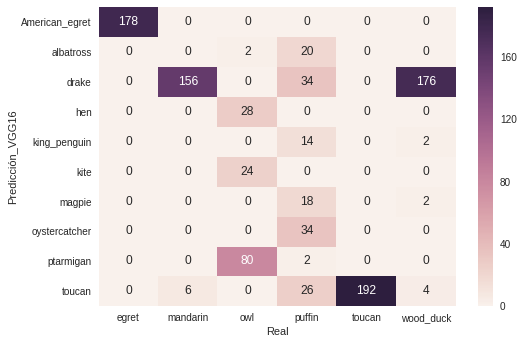

In [26]:
sns.heatmap(heat, annot=True, fmt=".0f")

En primera medida y teniendo en cuenta que se dejaron las categorías del modelo pre-entrenado, se observa que estas categorías no corresponden a los tipos de ave que deseamos identificar. Sin embargo de la matriz de confusión se observa que las categorías Egret, Toucan y Wood_duck, estan clasificadas correctamente en un 100%,  teniendo en cuenta que aunque las especies Drake y Wood_duck no son exactamente las mismas, si son semejantes. Por otro lado las otras categorías no se identifican claramente, lo cual se puede dar porque dentro de las 10 especies más frecuentes del modelo VGG16 no están exactamente las mismas categorías o alguna similar.

Por lo anterior se determina que es necesario entrenar nuevamente el modelo VGG16 utilizando proceso de transfer learning para acotar la salida a las seis categorías de interés

## 2. Transfer learning
   * Use the pre-trained CNN model as a feature extractor. Create a new model that replaces the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.
   * Train the model with the training images from the bird dataset. 
   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 
  

In [27]:
!ls

birds	   birds.zip.1	birds.zip.3  datalab	 Train_X.npy
birds.zip  birds.zip.2	C:	     Test_X.npy


Se utiliza para preentrenar las imagenes  el modelo VGG16 hasta la capa block5_pool la cual incluye 18 capas entre convoluciones y  maxpooling.

In [0]:
from keras.models import Model
# Extract features from an arbitrary intermediate layer
model1 = Model(inputs=model.input, outputs=model.get_layer('block5_pool').output)

In [29]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

La salida del modelo es un arreglo de 7x7x512 y utiliza en total 14'714.688 parámetros

In [30]:
typebirds = os.listdir('birds')
typebirds

['puffin', 'toucan', 'egret', 'wood_duck', 'owl', 'mandarin']

In [0]:
num_train_samples = 420
num_validation_samples = 180
epochs = 50
batch_size = 32

El siguiente código permite cargar las imagenes en el generador con medida 224x224 que es la medida utilizada por VGG16 en sus inputs, adicionalmente se parte la base en train y en test manteniendo una proporción 70%, 30% respectivamente 

In [32]:

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = data_generator.flow_from_directory('birds', target_size=(224, 224), shuffle=False, seed=13,
                                                     class_mode='categorical', batch_size=batch_size, subset="training")

validation_generator = data_generator.flow_from_directory('birds', target_size=(224, 224),  shuffle=False, seed=13,
                                                     class_mode='categorical', batch_size=batch_size, subset="validation")

Found 420 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [33]:
#Las imagenes quedan en una base tipo DirectoryIterator, la cual contiene toda la informacion de la generación anterior
validation_generator

In [34]:
#CATEGORIAS DE CADA BASE
y_train = train_generator.classes
val_labels = validation_generator.classes
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [35]:
#CONVIERTO LA y_train EN CATEGORIAS PARA LA PREDICCION
from keras import utils
# Convert labels to categorical one-hot encoding
train_labels = utils.to_categorical(y_train, num_classes=6)
train_labels[:10]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
#CONVIERTO LA y_test EN CATEGORIAS PARA LA PREDICCION
val_labels = utils.to_categorical(val_labels, num_classes=6)
val_labels[:10]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#GENERAR LA BASE DE SALIDA DE TRAIN DEL VGG16 PARA HACER TRANSFER  
X_datatrain = model1.predict_generator(train_generator)

In [0]:
#GENERAR LA BASE DE SALIDA DE TEST DEL VGG16 PARA HACER TRANSFER  
X_validation = model1.predict_generator(validation_generator)

In [39]:
#Tamaño de la matriz de entrenamiento
X_datatrain.shape[1:]

(7, 7, 512)

In [40]:
#Tamaño de la matriz de validacion
X_validation.shape

(180, 7, 7, 512)

Reemplazamos la parte superior del modelo preentrenado con una capa de 256 y 6 neuronas respectivamente:

In [0]:
#Definimos un nuevo modelo, el cuál recibe los datos del modelo precargado

model_1 = Sequential()
model_1.add(Flatten(input_shape=X_datatrain.shape[1:]))
model_1.add(Dense(256, activation='relu')) #CAPA INTERMEDIA
model_1.add(Dropout(0.5))
model_1.add(Dense(6, activation='softmax')) #SALIDA QUE HACE PREDICCION

model_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 6,424,326
Trainable params: 6,424,326
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.fit(X_datatrain, train_labels,
          epochs=50,
          batch_size=batch_size,
          validation_data=(X_validation, val_labels))

In [0]:
#HAGO PREDICCION
x_test = pd.DataFrame(columns = range(0,6))
y_test = pd.DataFrame(columns = range(0,6))
yt= pd.DataFrame()
ypredt= pd.DataFrame()
for x_batch, y_batch in validation_generator:
  #print(y_batch)
  #print(type(x_batch))
  pred = model_1.predict_proba(model1.predict(x_batch))
  #print(pred)
  yt = pd.DataFrame(y_batch)
  ypredt = pd.DataFrame(pred)
  x_test = x_test.append(yt, ignore_index=True)
  y_test = y_test.append(ypredt, ignore_index=True)
  break

In [0]:
#PREDICCION: Se realiza la predicción con los datos de validación
pred = model_1.predict_proba(X_validation)

In [0]:
#Se pasa la matriz de probabilidades de la prediccion a una lista de categorias con los nombres de los pájaros con una mayor probabilidad
y_pred = pd.DataFrame(list(pred), columns=typebirds).idxmax(axis=1)

In [0]:
#Se pasa la lista de ctegorias real a una lista de categorias con los nombres de los pájaros para medir la precisión
y = pd.DataFrame(list(val_labels), columns=typebirds).idxmax(axis=1)

Evaluamos los resultados sobre el conjunto de datos de prueba:

In [48]:
from sklearn.metrics import r2_score, roc_auc_score
print('AUC: ',roc_auc_score(val_labels, pred))

AUC:  0.9948148148148149


El accuracy que se obtuvo con este modelo es de 0.994, es decir que el 99.4% de las veces el modelo predice bien a que clase de pájaros pertenece cada imagen.

In [49]:
from sklearn.metrics import confusion_matrix

#s2 = dummies.idxmax(axis=1)s2 = dummies.idxmax(axis=1)


conf2 = confusion_matrix(y, y_pred, labels=fold_list)
conf2

array([[30,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  1,  2,  0],
       [ 2,  0, 27,  1,  0,  0],
       [ 1,  1,  1, 27,  0,  0],
       [ 0,  0,  0,  1, 29,  0],
       [ 3,  3,  0,  0,  0, 24]])

Confusion matrix, without normalization
[[30  0  0  0  0  0]
 [ 0 27  0  1  2  0]
 [ 2  0 27  1  0  0]
 [ 1  1  1 27  0  0]
 [ 0  0  0  1 29  0]
 [ 3  3  0  0  0 24]]


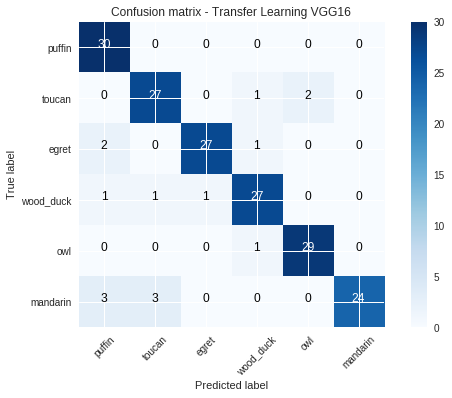

In [50]:
plot_confusion_matrix(conf2, classes=fold_list,
                     title='Confusion matrix - Transfer Learning VGG16')

En la matriz de confusión también se evidencia la eficiencia del modelo, en donde en muy pocos casos se clasifica una imagen en una clase diferente a la real.

## 3. Fine tuning
   * Repeat the experiment from the last question, but this time allow all the layers to be trained. 
   * Compare and discuss the results.

In [51]:
from keras.layers import Dense, GlobalAveragePooling2D

#Cargamos el modelo preentrenado el cual se nombro anteriormente como model1:

base_model = model1 #cargo VGG16 - Top=False

#Se genera la nueva capa de la Red neuronal. Estos parámetros se ajustaron hasta obtener el numero de capas y las neuronas óptimas 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

#Se define el modelo con las capas del VGG16 como capas de entrada y 
#la red neuronal para entrenamiento y predicción

modelFT = Model(inputs=base_model.input, outputs=predictions)

modelFT.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [52]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [0]:
#Se bloquean las primeras capas del modelo original
for layer in base_model.layers:
    layer.trainable = False

In [0]:
#Se parametrizan el optimizador y el loss
modelFT.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [55]:
train_generator.total_batches_seen

18

In [68]:
# Entrenamos el modelo precargado con 10 épocas:

modelFT.fit_generator(train_generator, epochs=10)


Epoch 1/10
14/14 [==============================] - 4s 292ms/step - loss: 0.1597 - acc: 0.9395
Epoch 2/10
14/14 [==============================] - 4s 282ms/step - loss: 0.1614 - acc: 0.9372
Epoch 3/10
14/14 [==============================] - 4s 283ms/step - loss: 0.1722 - acc: 0.9372
Epoch 4/10
14/14 [==============================] - 4s 281ms/step - loss: 0.0938 - acc: 0.9686
Epoch 5/10
14/14 [==============================] - 4s 281ms/step - loss: 0.1081 - acc: 0.9608
Epoch 6/10
14/14 [==============================] - 4s 282ms/step - loss: 0.1896 - acc: 0.9417
Epoch 7/10
14/14 [==============================] - 4s 282ms/step - loss: 0.1738 - acc: 0.9305
Epoch 8/10
14/14 [==============================] - 4s 281ms/step - loss: 0.0650 - acc: 0.9731
Epoch 9/10
14/14 [==============================] - 4s 284ms/step - loss: 0.0760 - acc: 0.9731
Epoch 10/10
14/14 [==============================] - 4s 281ms/step - loss: 0.1919 - acc: 0.9271


In [0]:
#Se bloquean las primeras capas del modelo, las cuales son las del VGG16, para que no se modifiquen los pesos
for layer in modelFT.layers[:18]:
   layer.trainable = False

#Para las capas finales se mantienen libres para optimizar los pesos
for layer in modelFT.layers[18:]:
   layer.trainable = True

In [70]:
from keras.optimizers import SGD
SGD(lr=0.0001, momentum=0.9)
modelFT.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


#Con los nuevos datos obtenidos a partir del modelo preentrenado, entrenamos un modelo con 50 épocas:

modelFT.fit_generator(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
14/14 [==============================] - 7s 496ms/step - loss: 0.7535 - acc: 0.8632 - val_loss: 0.2258 - val_acc: 0.9222
Epoch 2/50
14/14 [==============================] - 6s 438ms/step - loss: 0.1128 - acc: 0.9596 - val_loss: 0.4231 - val_acc: 0.8722
Epoch 3/50
14/14 [==============================] - 6s 440ms/step - loss: 0.1249 - acc: 0.9574 - val_loss: 0.4228 - val_acc: 0.8833
Epoch 4/50
14/14 [==============================] - 6s 439ms/step - loss: 0.0873 - acc: 0.9619 - val_loss: 0.4156 - val_acc: 0.8722
Epoch 5/50
14/14 [==============================] - 6s 445ms/step - loss: 0.1358 - acc: 0.9395 - val_loss: 0.3944 - val_acc: 0.8778
Epoch 6/50
14/14 [==============================] - 6s 439ms/step - loss: 0.1177 - acc: 0.9552 - val_loss: 0.2282 - val_acc: 0.9167
Epoch 7/50
14/14 [==============================] - 6s 439ms/step - loss: 0.0292 - acc: 0.9933 - val_loss: 0.2494 - val_acc: 0.9278
Epoch 8/50
14/14 [==============================] - 6s 439ms/step - loss: 0.

14/14 [==============================] - 6s 440ms/step - loss: 0.0163 - acc: 0.9978 - val_loss: 0.4515 - val_acc: 0.8722
Epoch 11/50
14/14 [==============================] - 6s 454ms/step - loss: 0.1754 - acc: 0.9238 - val_loss: 0.3837 - val_acc: 0.8944
Epoch 12/50
14/14 [==============================] - 6s 440ms/step - loss: 0.0200 - acc: 0.9955 - val_loss: 0.1986 - val_acc: 0.9500
Epoch 13/50
14/14 [==============================] - 6s 446ms/step - loss: 0.0294 - acc: 0.9865 - val_loss: 1.1120 - val_acc: 0.7778
Epoch 14/50
14/14 [==============================] - 6s 446ms/step - loss: 0.0541 - acc: 0.9843 - val_loss: 0.3447 - val_acc: 0.8889
Epoch 15/50
14/14 [==============================] - 6s 448ms/step - loss: 0.1701 - acc: 0.9439 - val_loss: 0.2622 - val_acc: 0.9389
Epoch 16/50
14/14 [==============================] - 6s 440ms/step - loss: 0.2111 - acc: 0.9193 - val_loss: 0.7731 - val_acc: 0.8222
Epoch 17/50
14/14 [==============================] - 6s 441ms/step - loss: 0.1177

14/14 [==============================] - 6s 439ms/step - loss: 0.1145 - acc: 0.9619 - val_loss: 0.5173 - val_acc: 0.8778
Epoch 20/50
14/14 [==============================] - 6s 448ms/step - loss: 0.1094 - acc: 0.9596 - val_loss: 0.2821 - val_acc: 0.9500
Epoch 21/50
14/14 [==============================] - 6s 447ms/step - loss: 0.0187 - acc: 0.9910 - val_loss: 0.3408 - val_acc: 0.9111
Epoch 22/50
14/14 [==============================] - 6s 433ms/step - loss: 0.0534 - acc: 0.9753 - val_loss: 0.2634 - val_acc: 0.9278
Epoch 23/50
14/14 [==============================] - 6s 439ms/step - loss: 0.1048 - acc: 0.9641 - val_loss: 0.7587 - val_acc: 0.8500
Epoch 24/50
14/14 [==============================] - 6s 447ms/step - loss: 0.1411 - acc: 0.9619 - val_loss: 0.1837 - val_acc: 0.9444
Epoch 25/50
14/14 [==============================] - 6s 441ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.2336 - val_acc: 0.9389
Epoch 26/50
14/14 [==============================] - 6s 447ms/step - loss: 0.0589

14/14 [==============================] - 6s 448ms/step - loss: 0.0796 - acc: 0.9664 - val_loss: 0.6126 - val_acc: 0.8611
Epoch 29/50
14/14 [==============================] - 6s 440ms/step - loss: 0.1663 - acc: 0.9507 - val_loss: 0.2222 - val_acc: 0.9444
Epoch 30/50
14/14 [==============================] - 6s 440ms/step - loss: 0.0430 - acc: 0.9821 - val_loss: 0.2044 - val_acc: 0.9389
Epoch 31/50
14/14 [==============================] - 6s 448ms/step - loss: 0.0328 - acc: 0.9865 - val_loss: 0.2117 - val_acc: 0.9611
Epoch 32/50
14/14 [==============================] - 6s 447ms/step - loss: 0.0087 - acc: 0.9978 - val_loss: 0.2054 - val_acc: 0.9611
Epoch 33/50
14/14 [==============================] - 6s 447ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.2859 - val_acc: 0.9167
Epoch 34/50
14/14 [==============================] - 6s 447ms/step - loss: 0.1116 - acc: 0.9462 - val_loss: 0.2787 - val_acc: 0.9444
Epoch 35/50
14/14 [==============================] - 6s 440ms/step - loss: 0.0317

14/14 [==============================] - 6s 447ms/step - loss: 0.0224 - acc: 0.9910 - val_loss: 0.2653 - val_acc: 0.9556
Epoch 38/50
14/14 [==============================] - 6s 448ms/step - loss: 0.0602 - acc: 0.9753 - val_loss: 0.2732 - val_acc: 0.9500
Epoch 39/50
14/14 [==============================] - 6s 449ms/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.4493 - val_acc: 0.9167
Epoch 40/50
14/14 [==============================] - 6s 448ms/step - loss: 0.0106 - acc: 0.9955 - val_loss: 0.2724 - val_acc: 0.9389
Epoch 41/50
14/14 [==============================] - 6s 440ms/step - loss: 0.1502 - acc: 0.9552 - val_loss: 0.3569 - val_acc: 0.9333
Epoch 42/50
14/14 [==============================] - 6s 441ms/step - loss: 0.0225 - acc: 0.9910 - val_loss: 0.2489 - val_acc: 0.9500
Epoch 43/50
14/14 [==============================] - 6s 447ms/step - loss: 0.0122 - acc: 0.9933 - val_loss: 0.3902 - val_acc: 0.9222
Epoch 44/50
14/14 [==============================] - 6s 441ms/step - loss: 0.1939

14/14 [==============================] - 6s 448ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.2311 - val_acc: 0.9389
Epoch 47/50
14/14 [==============================] - 6s 454ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.2983 - val_acc: 0.9278
Epoch 48/50
14/14 [==============================] - 6s 446ms/step - loss: 0.1817 - acc: 0.9439 - val_loss: 0.3135 - val_acc: 0.9278
Epoch 49/50
14/14 [==============================] - 6s 446ms/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.2269 - val_acc: 0.9556
Epoch 50/50
14/14 [==============================] - 6s 446ms/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.2535 - val_acc: 0.9500


In [71]:
pred_FT = modelFT.predict_generator(validation_generator, verbose=1)

6/6 [==============================] - 2s 336ms/step


In [72]:
#Estos son los resultados de la predicción, que son las probabilidades de que cada imagen pertenezca a alguna clase en particular
pred_FT

array([[1.00000000e+00, 5.02226616e-09, 1.74535646e-12, 6.49249865e-15,
        6.33761765e-10, 5.86047315e-15],
       [1.00000000e+00, 2.58413652e-13, 1.75641910e-17, 2.30910525e-16,
        8.52927238e-17, 6.41616671e-17],
       [9.99998808e-01, 2.85785191e-08, 1.60419434e-13, 3.01826814e-12,
        7.02000003e-12, 1.17095908e-06],
       ...,
       [7.75730058e-08, 2.71099634e-06, 1.35574664e-16, 1.03032721e-10,
        1.69562542e-09, 9.99997258e-01],
       [1.20209545e-11, 8.65479160e-05, 1.02242270e-17, 3.95615513e-10,
        6.54787910e-13, 9.99913454e-01],
       [8.28944769e-13, 2.58736435e-07, 1.37511153e-22, 2.06383864e-14,
        4.06970797e-16, 9.99999762e-01]], dtype=float32)

Evaluamos los resultados sobre el conjunto de datos de prueba:

In [73]:
from sklearn.metrics import log_loss

score = log_loss(val_labels, pred_FT)
print('AUC: ',roc_auc_score(val_labels, pred_FT))
print(score)

AUC:  0.9971851851851853
0.25346226428481966


El accuracy que se obtuvo con este modelo es de 0.997, es decir que el 99.7% de las veces el modelo predice bien a que clase de pájaros pertenece cada imagen.

In [74]:
val_labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
#Se pasa la matriz de probabilidades a una lista de categorias con los nombres de los pájaros con una mayor probabilidad
y_pred_FT = pd.DataFrame(list(pred_FT), columns=typebirds).idxmax(axis=1)

In [77]:
confFT = confusion_matrix(y, y_pred_FT, labels=typebirds)
confFT

array([[30,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  1,  0,  0],
       [ 0,  0, 29,  0,  0,  1],
       [ 0,  0,  2, 27,  0,  1],
       [ 0,  0,  0,  2, 27,  1],
       [ 0,  1,  0,  0,  0, 29]])

Confusion matrix, without normalization
[[30  0  0  0  0  0]
 [ 0 29  0  1  0  0]
 [ 0  0 29  0  0  1]
 [ 0  0  2 27  0  1]
 [ 0  0  0  2 27  1]
 [ 0  1  0  0  0 29]]


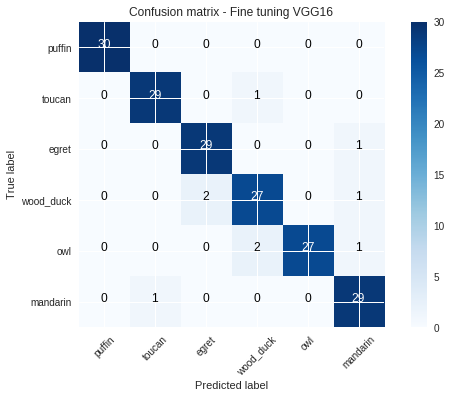

In [78]:
plot_confusion_matrix(confFT, classes=fold_list,
                     title='Confusion matrix - Fine tuning VGG16')

El accuracy obtenido mediante Fine tuning indica que este modelo mejora la eficiencia de las clasificaciones de imagenes; de la misma manera la matriz de confusión nos muestra muy pocos casos en donde el modelo clasifica una imagen en una clase diferente a la real.

Podemos concluir que el uso de modelos pre-entrenados es muy útil para encontrar soluciones a problemas propios, sin embargo es necesario modificarlos de acuerdo a las necesidades propias del ejercicio que se está desarrollando; y para obtener un mayor desempeño, modificarlos y re-entrenarlos.